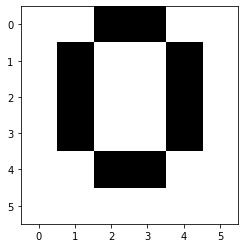

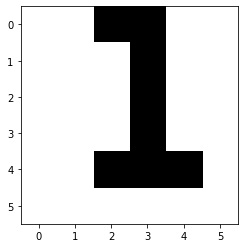

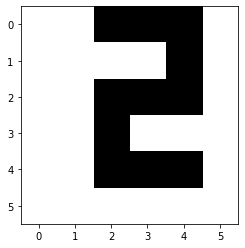

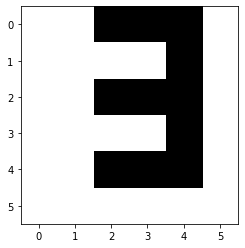

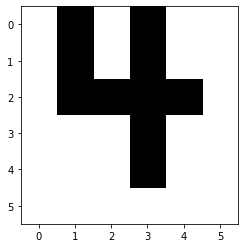

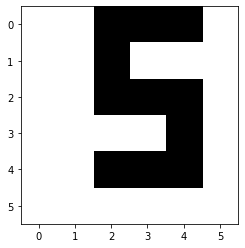

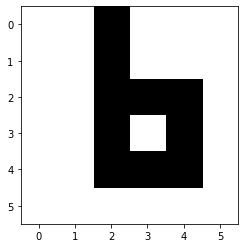

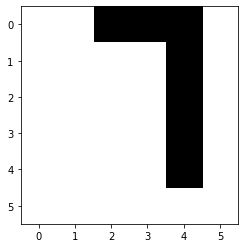

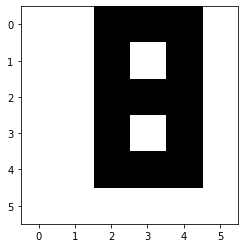

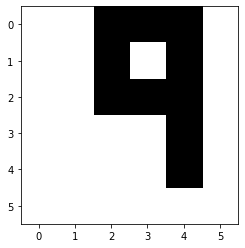

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
zero=np.array([[1,1,0,0,1,1],
    [1,0,1,1,0,1],
     [1,0,1,1,0,1],
     [1,0,1,1,0,1],
     [1,1,0,0,1,1],
     [1,1,1,1,1,1]], dtype=np.uint8)
one=np.array([
    [1,1,0,0,1,1],
     [1,1,1,0,1,1],
     [1,1,1,0,1,1],
     [1,1,1,0,1,1],
     [1,1,0,0,0,1],
[1,1,1,1,1,1],], dtype=np.uint8)
two=np.array([[1,1,0,0,0,1],
    [1,1,1,1,0,1],
     [1,1,0,0,0,1],
     [1,1,0,1,1,1],
     [1,1,0,0,0,1],
     [1,1,1,1,1,1]], dtype=np.uint8)
three=np.array([[1,1,0,0,0,1],
    [1,1,1,1,0,1],
     [1,1,0,0,0,1],
     [1,1,1,1,0,1],
     [1,1,0,0,0,1],
     [1,1,1,1,1,1]], dtype=np.uint8)
four=np.array([[1,0,1,0,1,1],
    [1,0,1,0,1,1],
     [1,0,0,0,0,1],
     [1,1,1,0,1,1],
     [1,1,1,0,1,1],
     [1,1,1,1,1,1]], dtype=np.uint8)
five=np.array([[1,1,0,0,0,1],
    [1,1,0,1,1,1],
     [1,1,0,0,0,1],
     [1,1,1,1,0,1],
     [1,1,0,0,0,1],
     [1,1,1,1,1,1]], dtype=np.uint8)
six=np.array([[1,1,0,1,1,1],
    [1,1,0,1,1,1],
     [1,1,0,0,0,1],
     [1,1,0,1,0,1],
     [1,1,0,0,0,1],
     [1,1,1,1,1,1]], dtype=np.uint8)
seven=np.array([[1,1,0,0,0,1],
    [1,1,1,1,0,1],
     [1,1,1,1,0,1],
    [1,1,1,1,0,1],
     [1,1,1,1,0,1],
     [1,1,1,1,1,1]], dtype=np.uint8)
eight=np.array([[1,1,0,0,0,1],
    [1,1,0,1,0,1],
     [1,1,0,0,0,1],
     [1,1,0,1,0,1],
     [1,1,0,0,0,1],
     [1,1,1,1,1,1]], dtype=np.uint8)
nine=np.array([[1,1,0,0,0,1],
    [1,1,0,1,0,1],
     [1,1,0,0,0,1],
     [1,1,1,1,0,1],
     [1,1,1,1,0,1],
     [1,1,1,1,1,1]], dtype=np.uint8)
num=[zero,one,two,three,four,five,six,seven,eight,nine]
for n in num:
    plt.imshow(n,cmap='gray')
    plt.show()

In [3]:
def feature_extract(num):
    sobelx = cv2.Sobel(num, -1,1,0,ksize=3)
    sobely = cv2.Sobel(num, -1,0,1,ksize=3)
    feature = np.concatenate((np.sum(sobely,axis=0)[1:6],np.sum(sobelx,axis=1)[1:6]),axis=0).tolist()
    return feature
feature=[]
for n in num:
    feature.append(feature_extract(n))
A = np.mat(feature) 
print(A)
b = np.mat(range(10)).T
print(b)

[[3 3 3 3 4 3 4 3 3 4]
 [1 3 3 1 0 5 4 4 3 2]
 [1 2 1 2 2 2 2 4 3 2]
 [0 0 1 2 2 2 2 2 2 2]
 [5 5 4 3 2 4 4 4 3 2]
 [1 2 1 2 2 4 2 2 2 2]
 [1 2 2 2 2 4 3 2 2 2]
 [1 3 4 3 2 1 0 0 0 0]
 [1 2 2 2 2 2 2 2 2 2]
 [2 5 5 3 2 2 2 1 0 0]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [4]:
r = np.linalg.solve(A,b)        # 调用 solve 函数求解
print( r)
#判别器为feature*r

[[ -5.5 ]
 [  9.25]
 [ -8.  ]
 [ 13.25]
 [ -8.75]
 [ -5.5 ]
 [  9.  ]
 [-15.5 ]
 [ 17.  ]
 [ -4.  ]]


In [5]:
#check
for n in num:
    print(np.rint(np.mat(feature_extract(n))*r))


[[0.]]
[[1.]]
[[2.]]
[[3.]]
[[4.]]
[[5.]]
[[6.]]
[[7.]]
[[8.]]
[[9.]]
